In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [2]:
# Load dataset
df = pd.read_csv("./Binary.csv")

In [3]:
# Split dataset into features (X) and target (Y)
X = df.drop(columns=['target'])  # Drop target column
y = df['target']

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train SVM model
svm_model = SVC(kernel='linear', probability=True)  # Linear Kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [7]:
# Predictions
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

In [8]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [9]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9358
Precision: 0.9574
Recall: 0.9677
F1 Score: 0.9626


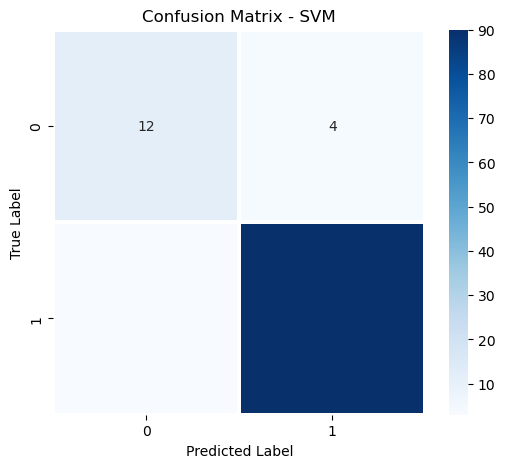

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

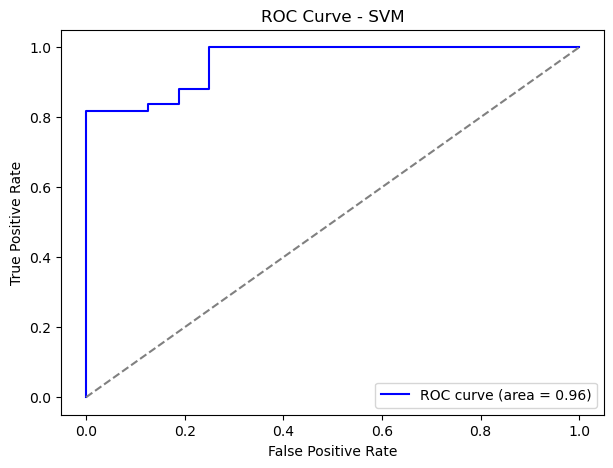

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

**Support Vector Machines - Built From Scratch**

In [27]:
class ScratchSVM:
    def __init__(self, lr=0.01, lambda_param=0.001, n_iters=1000, kernel=None):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.kernel = kernel  # Can be 'poly' or 'rbf'
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert labels from {0,1} to {-1,1}
        y = np.where(y == 0, -1, 1)

        # Apply Kernel if specified
        if self.kernel == "poly":
            X = self.polynomial_kernel(X, degree=3)
        elif self.kernel == "rbf":
            X = self.rbf_kernel(X, gamma=0.1)

        # Initialize weights
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for i in range(n_samples):
                margin = y[i] * (np.dot(X[i], self.w) + self.b)
                if margin >= 1:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)  # Regularization
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(X[i], y[i]))
                    self.b -= self.lr * y[i]

    def predict(self, X):
        # Apply Kernel if specified
        if self.kernel == "poly":
            X = self.polynomial_kernel(X, degree=3)
        elif self.kernel == "rbf":
            X = self.rbf_kernel(X, gamma=0.1)

        # Compute predictions
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

    @staticmethod
    def polynomial_kernel(X, degree=3):
        return (np.dot(X, X.T) + 1) ** degree

    @staticmethod
    def rbf_kernel(X, gamma=0.1):
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) - 2 * np.dot(X, X.T) + np.sum(X**2, axis=1)
        return np.exp(-gamma * sq_dists)

In [28]:
# Train the SVM
svm = ScratchSVM(lr=0.01, lambda_param=0.001, n_iters=1000, kernel="rbf")  # Try "poly" or "rbf"
svm.fit(X_train, y_train)

In [29]:
# Predictions
y_pred = svm.predict(X_test)

# Convert predictions from {-1, 1} to {0,1}
y_pred = np.where(y_pred == -1, 0, 1)

ValueError: shapes (109,109) and (435,) not aligned: 109 (dim 1) != 435 (dim 0)

In [23]:
# Convert back to 0,1
y_pred_scratch = np.where(y_pred_scratch == -1, 0, 1)

In [25]:
# Performance Metrics
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch, zero_division=1)
recall_scratch = recall_score(y_test, y_pred_scratch)
f1_scratch = f1_score(y_test, y_pred_scratch)

In [26]:
print(f"Scratch SVM - Accuracy: {accuracy_scratch:.4f}")
print(f"Scratch SVM - Precision: {precision_scratch:.4f}")
print(f"Scratch SVM - Recall: {recall_scratch:.4f}")
print(f"Scratch SVM - F1 Score: {f1_scratch:.4f}")

Scratch SVM - Accuracy: 0.1468
Scratch SVM - Precision: 1.0000
Scratch SVM - Recall: 0.0000
Scratch SVM - F1 Score: 0.0000


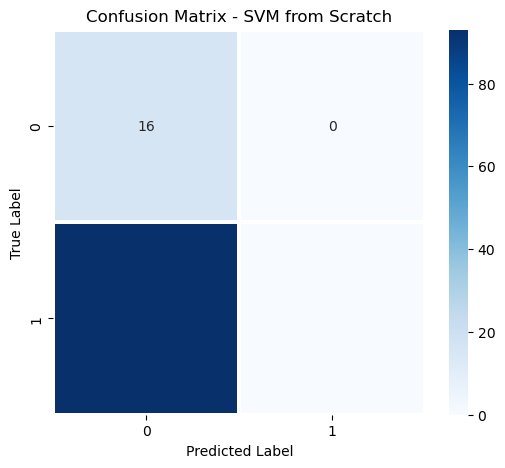

In [18]:
# Confusion Matrix
cm_scratch = confusion_matrix(y_test, y_pred_scratch)
plt.figure(figsize=(6,5))
sns.heatmap(cm_scratch, annot=True, fmt='.0f', cmap='Blues', linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM from Scratch")
plt.show()